In [17]:
import numpy as np
import json
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
def read_json(path):
    with open(path, encoding='utf-8') as f:
        iter_f = iter(f)
        line = f.readline()
        text = []
        for line in iter_f: 
            d = json.loads(line)
            text.append(d)
        f.close()
    return(text)

In [3]:
def write_json(path, data):
    with open(path, 'w', encoding="utf-8") as f:
        return json.dump(data, f, indent=2)

In [4]:
raw_business=read_json("Stat628/business.json")
raw_review=read_json("Stat628/review.json")
raw_tip=read_json("Stat628/tip.json")
raw_user=read_json("Stat628/user.json")

In [ ]:
frame_business=pd.DataFrame(raw_business)
frame_review=pd.DataFrame(raw_review)
frame_tip=pd.DataFrame(raw_tip)
frame_user=pd.DataFrame(raw_user)

In [5]:
seafood_business=[]
index=[]
for i in range(len(raw_business)):
    if raw_business[i]['categories'] is None:
        continue
    if "Seafood" in raw_business[i]['categories'] and "Restaurants" in  raw_business[i]['categories']:
        seafood_business.append(raw_business[i])
        index.append(i)

In [6]:
seafood_review={}
for i in range(len(seafood_business)):
    seafood_review[seafood_business[i]['business_id']]=[]

In [7]:
for i in range(len(raw_review)):
    for key in seafood_review.keys():
        if raw_review[i]['business_id']==key:
            seafood_review[key].append(raw_review[i])

In [48]:
#put reviews together
all_review=[]
for i in range(len(seafood_business)):
    all_review.extend(seafood_review[seafood_business[i]['business_id']])

In [87]:
all_review[300]

{'review_id': 'IwBsa2BDyVU_slbaFqGeNw',
 'user_id': 'zh3C0Nner3tyJ98NXAiSsw',
 'business_id': 'nsNONDHbV7Vudqh21uicqw',
 'stars': 2.0,
 'useful': 1,
 'funny': 0,
 'cool': 0,
 'text': "Happy hour is great if that is just what you are going for. Otherwise, dinner is very hit or miss. Sides are always cold and you don't have many options. You would think if you only have four options they would be excellent for what you are paying. From steak to lobster it's just meh...Service is just mediocre, very snooty. It's a cute place but don't waste your time or especially your money if you want a great seafood dinner. We have been here 4+ times hoping for a change but nothing. Mediocre is the consistency here.",
 'date': '2016-07-28 05:44:21'}

In [ ]:
#words list
word_food=['hot','fresh','oyster']
word_price=['expensive','pricey','cheap',]
word_service=['']
word_environment=['comfortable','clean']
word_positive=['good','great','comparable','ample','efficient','huge','nice','tasty','enjoyable','fancy','comfortable','enjoy','decent','beautiful']
word_negative=['horrible','disgusting','disappoint'.'mediocre','bad','pricey','poor']

In [44]:
# check rating vs review_num
rating={}
for i in range(len(seafood_business)):
    if seafood_business[i]['stars'] not in rating.keys():
        rating[seafood_business[i]['stars']]=1
    else:
        rating[seafood_business[i]['stars']]+=1

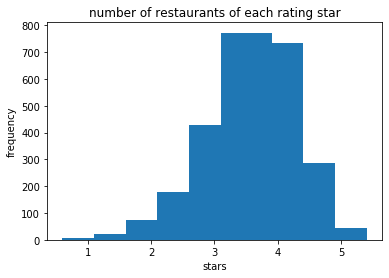

In [55]:
# plot of rating 
plt.bar(rating.keys(),rating.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title("number of restaurants of each rating star")
None

In [51]:
#check reviews and star
review_star={}
for i in range(len(all_review)):
    if all_review[i]['stars'] not in review_star.keys():
        review_star[all_review[i]['stars']]=1
    else:
        review_star[all_review[i]['stars']]+=1

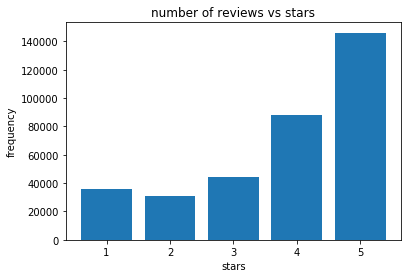

In [54]:
#plot star vs review_num
plt.bar(review_star.keys(),review_star.values())
plt.xlabel("stars")
plt.ylabel("frequency")
plt.title("number of reviews vs stars")
None

In [71]:
# review_star
review_star={}
for item in all_review:
    if item['stars'] not in review_star.keys():
        review_star[item['stars']]=[]
        review_star[item['stars']].append(item)
    else:
        review_star[item['stars']].append(item)

In [83]:
# plot word occurrence vs review
def plot_word(word,reviews):
    word_star={}
    for i in range(1,6):
        occurence=0
        for review in review_star[i]:
            if word in review['text'].lower():
                occurence+=1
        word_star[i]=occurence/len(review_star[i])
    plt.bar(word_star.keys(),word_star.values())
    plt.xlabel("stars")
    plt.ylabel("frequency")
    plt.title(word)
    plt.show()

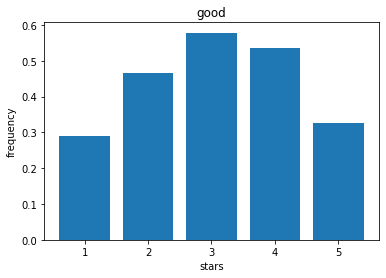

In [84]:
plot_word('good',all_review)